##Import liblary yang di butuhkan untuk data loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

##Mounting google drive karena datasets berada di akun google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
houses =pd.read_csv("gdrive/MyDrive/datasets/USA_Housing.csv")
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Drop kolom address karena pengaruh alamat terhadap variable y (price) kita sudah di wakili dengan feature Avg. Area Income

In [4]:
houses.drop(["Address"],axis=1, inplace=True)

Melihat dimensi data frame hasil dibawah ini berarti dataframe memiliki 5000 rows dan 7 kolom

In [5]:
houses.shape

(5000, 6)

Rename Kolom supaya lebih mudah dibaca

In [6]:
houses.rename(columns={'Avg. Area Income': 'area_income', 
                   'Avg. Area House Age': 'house_age',
                   'Avg. Area Number of Rooms':'numberof_room',
                   'Avg. Area Number of Bedrooms':'numberof_bedrooms',
                   'Area Population':'population'}, inplace=True)
houses.columns

Index(['area_income', 'house_age', 'numberof_room', 'numberof_bedrooms',
       'population', 'Price'],
      dtype='object')

Melihat type pada fitur fitur yang kita miliki

In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_income        5000 non-null   float64
 1   house_age          5000 non-null   float64
 2   numberof_room      5000 non-null   float64
 3   numberof_bedrooms  5000 non-null   float64
 4   population         5000 non-null   float64
 5   Price              5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


Fiture number of room dan number of bedroom menunjukan jumlah ruangan yang di miliki di masing masing rumah, sangat aneh jika fitur tersebut bertipe float, maka saya akan konversi kedalam integer

In [8]:
houses[["numberof_room","numberof_bedrooms"]] = houses[["numberof_room","numberof_bedrooms"]].astype(int)

In [9]:
houses.describe()

,area_income,house_age,numberof_room,numberof_bedrooms,population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.492200,3.732400,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.048503,1.225843,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.000000,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.000000,3.000000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.000000,4.000000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.000000,4.000000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.000000,6.000000,69621.713378,2.469066e+06


indentifikasi null dan na value (missing value)

In [10]:
houses.isnull().sum()

area_income          0
house_age            0
numberof_room        0
numberof_bedrooms    0
population           0
Price                0
dtype: int64

In [11]:
houses.isna().sum()

area_income          0
house_age            0
numberof_room        0
numberof_bedrooms    0
population           0
Price                0
dtype: int64

In [12]:
houses.columns

Index(['area_income', 'house_age', 'numberof_room', 'numberof_bedrooms',
       'population', 'Price'],
      dtype='object')

Menangani Outliers

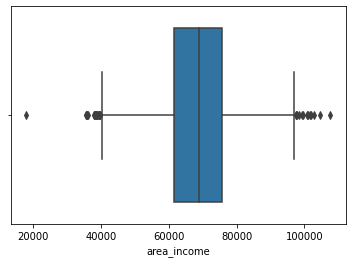

In [13]:
import seaborn as sns
sns.boxplot(x=houses["area_income"])

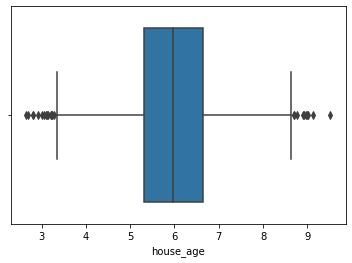

In [14]:
sns.boxplot(x=houses["house_age"])

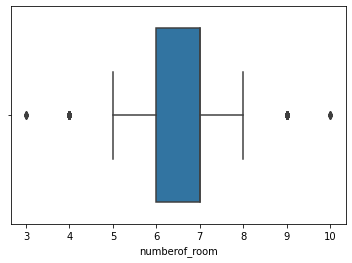

In [15]:
sns.boxplot(x=houses["numberof_room"])

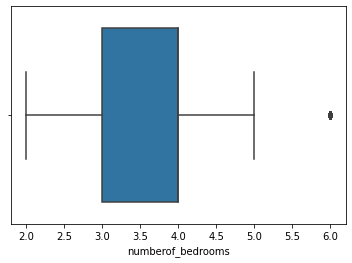

In [16]:
sns.boxplot(x=houses["numberof_bedrooms"])

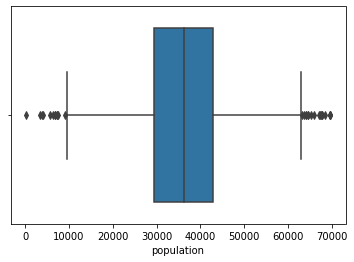

In [17]:
sns.boxplot(x=houses["population"])

Dari grafis di atas memberi tahu kita bahwa semua fitur numerik yang kita punya memiliki outliers, mari kita tangani menggunakan methode IQR

In [18]:
Q1 = houses.quantile(0.25)
Q3 = houses.quantile(0.75)
IQR = Q3 - Q1

houses = houses[~((houses<(Q1-1.5*IQR))|(houses>(Q3+1.5*IQR))).any(axis=1)]
houses.shape

(4086, 6)

Melihat rumah yang memiliki berapa ruangan yang paling banyak di negara USA

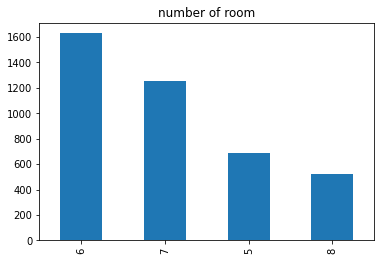

In [19]:
count = houses["numberof_room"].value_counts()
count.plot(kind="bar", title="number of room")

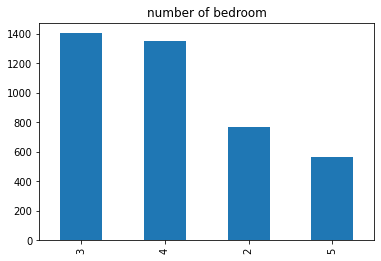

In [20]:
count = houses["numberof_bedrooms"].value_counts()
count.plot(kind="bar", title="number of bedroom")

In [21]:
houses["Price"] = houses["Price"]//10000

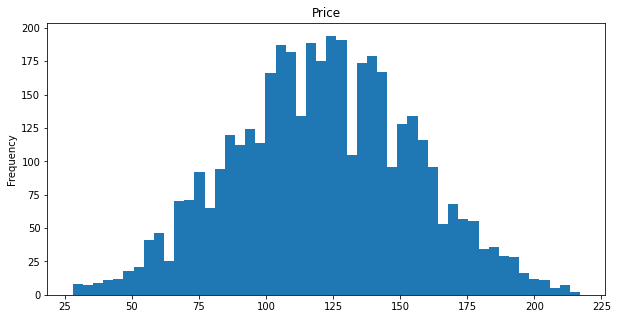

In [23]:

houses["Price"].plot(kind="hist",bins=50, figsize=(10,5), title="Price")
plt.show()

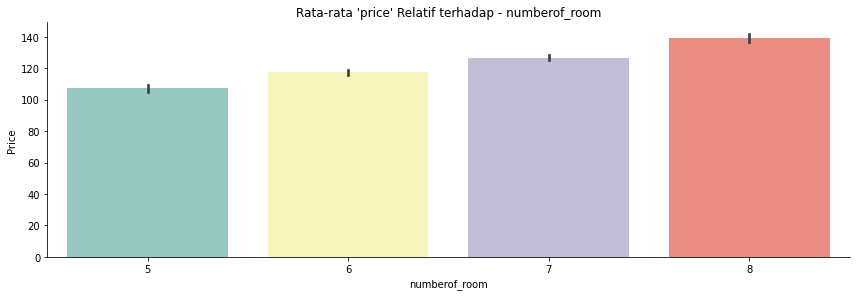

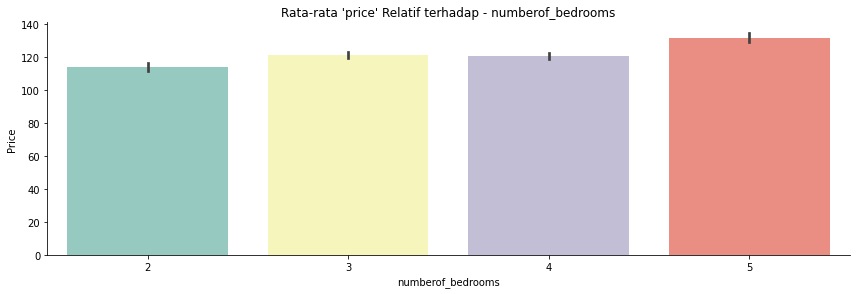

In [25]:
cat_features = houses[["numberof_room","numberof_bedrooms"]].columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=houses, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

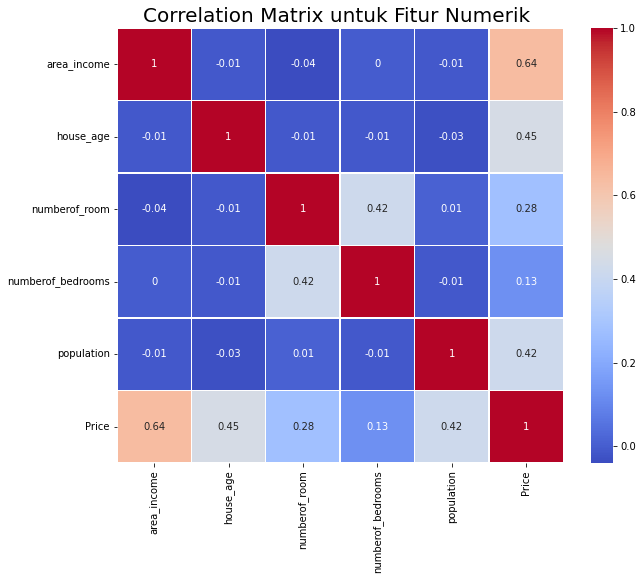

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = houses.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Table heatmap di atas menunujkan korelasi fitur price sangat tinggi dengan fitur Avg. Area Income dan korelasi paling rendah dengan fitur Avg.Area Number of Bedrooms namun korelasi itu tidak terlalu rendah sehingga kita tidak perlu rop fitur tersebut

In [ ]:
houses.head()

,area_income,house_age,numberof_room,numberof_bedrooms,population,Price
0,79545.458574,5.682861,7,4,23086.800503,105.0
1,79248.642455,6.002900,6,3,40173.072174,150.0
2,61287.067179,5.865890,8,5,36882.159400,105.0
3,63345.240046,7.188236,5,3,34310.242831,126.0
4,59982.197226,5.040555,7,4,26354.109472,63.0


Memisahkan fitur X dan y dan membagi dengan ratio data test 20% dari total data

In [26]:
from sklearn.model_selection import train_test_split
 
X = houses.drop(["Price"],axis =1)
y = houses["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [27]:
X_train.shape

(3268, 5)

In [28]:
X_test.shape

(818, 5)

In [29]:
X.shape

(4086, 5)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3268 entries, 4157 to 4371
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_income        3268 non-null   float64
 1   house_age          3268 non-null   float64
 2   numberof_room      3268 non-null   int64  
 3   numberof_bedrooms  3268 non-null   int64  
 4   population         3268 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 153.2 KB


In [30]:
from sklearn.preprocessing import MinMaxScaler
 
numerical_features = X_train.select_dtypes(include=["float64", "int64"]).columns
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,area_income,house_age,numberof_room,numberof_bedrooms,population
4157,0.201620,0.327234,1.000000,0.666667,0.438525
4947,0.323408,0.420310,1.000000,1.000000,0.824447
4057,0.663997,0.375402,1.000000,0.666667,0.386191
786,0.431707,0.661628,0.666667,0.333333,0.721823
377,0.624772,0.452023,1.000000,1.000000,0.524533


In [31]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [32]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        }
        
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

,model,best_score,best_params
0,knn,0.542126,{'n_neighbors': 15}
1,boosting,0.710640,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.859756,"{'max_depth': 16, 'n_estimators': 100, 'random..."


In [34]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [40]:
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [41]:
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

In [42]:
boosting = AdaBoostRegressor(learning_rate=0.1, random_state=11, n_estimators=100)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Membuat table untuk masing masing score MSE pada setiap model machine learning yang kita gunakan

In [44]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e2
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e2
 
# Panggil mse
mse

,train,test
KNN,1.580394,1.817732
RF,0.219374,1.647054
Boosting,2.930384,3.356836


In [49]:
knn_accuracy = knn.score(X_test, y_test)*100
rf_accuracy = RF.score(X_test, y_test)*100
boosting_accuracy = boosting.score(X_test, y_test)*100


In [50]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
evaluasi

,Accuracy (%)
K-Nearest Neighbor,83.333167
Random Forest,84.898115
Boosting,69.221075


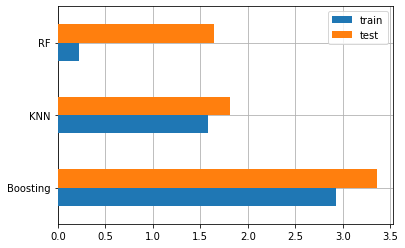

In [45]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
prediksi = X_test.iloc[:7].copy()
pred_dict = {'y_true':y_test[:7]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1796,126.0,112.3,115.6,125.5
1203,132.0,139.1,131.4,132.1
4225,107.0,126.1,111.2,97.3
698,78.0,74.3,71.4,75.7
3663,62.0,78.6,67.6,80.8
2161,134.0,120.1,120.6,138.0
40,102.0,98.2,103.3,111.4


In [51]:
RF.score(X_test,y_test)

0.8489811455888392